In [ ]:
!pip install tensorflow_federated

# dataset

## download data

In [ ]:
import requests
import shutil
import os
import re
import datetime as dt
import sys
import pandas as pd
import zipfile as zf

# Downloading and Unpacking data
# Download original email dataset from Athens University of Economics and Business website
print('Beginning download of email data set from http://www.aueb.gr/users/ion/data/enron-spam...')

url_base = 'http://www.aueb.gr/users/ion/data/enron-spam/preprocessed/'
enron_list = ["enron1", "enron2", "enron3", "enron4", "enron5", "enron6"]

if not os.path.exists("raw data"):
    os.mkdir("raw data")

for entry in enron_list:
    print("Downloading archive: " + entry + "...")

    # Download current enron archive
    url = url_base + entry + ".tar.gz"

    # Adding verify=False to bypass SSL certificate verification
    # WARNING: This is a workaround and should be used cautiously as it disables security checks.
    # Ideally, you should resolve the underlying SSL certificate issue instead.
    r = requests.get(url, verify=False)

    path = "raw data/" + entry + ".tar.gz"

    with open(path, 'wb') as f:
        f.write(r.content)
    print('...done! Archive saved to: ' + path)

    # Unpack current archive this will unpack to /raw data/enron1, etc
    print("Unpacking contents of " + entry + " archive...")
    shutil.unpack_archive(path, "raw data/")
    print("...done! Archive unpacked to: raw data/" + entry)

print("All email archieves downloaded and unpacked. Now beggining processing of email text files.")

# Processing data
# The data is recorded in such a way, that each message is in a seperate file.
# Therefore, we have to open each single file, parse it and add it to a dataframe

mails_list = []

print("Processing directories...")
# go through all dirs in the list
# each dir contains a ham & spam folder
for directory in enron_list:
    print("...processing " + str(directory) + "...")
    ham_folder = "raw data/" + directory + "/ham"
    spam_folder = "raw data/" + directory + "/spam"
    i = 0

    # Process ham messages in directory
    for entry in os.scandir(ham_folder):
        # This should be encoded in Latin_1 but catch encoding errors just to be sure
        try:
            file = open(entry, encoding="latin_1")
            content = file.read().split("\n", 1)
        except (UnicodeDecodeError):
            print("COULD NOT DECODE")
            print("Problem with file:" + str(entry))
            print("Error message:", sys.exc_info()[1])
        subject = content[0].replace("Subject: ", "")
        message = content[1]
        # date is contained in filename - parsed using regex pattern
        pattern = r"\d+\.(\d+-\d+-\d+)"
        date = re.search(pattern, str(entry)).group(1)
        date = dt.datetime.strptime(date, '%Y-%m-%d')
        file.close()
        mails_list.append([subject, message, "ham", date])

    # Process spam messages in directory
    for entry in os.scandir(spam_folder):
        try:
            file = open(entry, encoding="latin_1")
            content = file.read().split("\n", 1)
        except (UnicodeDecodeError):
            print("COULD NOT DECODE")
            print("Problem with file:" + str(entry))
            print("Error message:", sys.exc_info()[1])
        subject = content[0].replace("Subject: ", "")
        message = content[1]
        # date is contained in filename - parsed using regex pattern
        pattern = r"\d+\.(\d+-\d+-\d+)"
        date = re.search(pattern, str(entry)).group(1)
        date = dt.datetime.strptime(date, '%Y-%m-%d')
        file.close()
        mails_list.append([subject, message, "spam", date])

    print(str(directory)+" processed!")

print("All directories processed. Writing to Dataframe...")
mails = pd.DataFrame(mails_list, columns=[
                     "Subject", "Message", "Spam/Ham", "Date"])
print("...done!")

# Save to file
# print("Saving data to file...")
# with zf.ZipFile('enron_spam_data.zip', 'w') as enron_zip:
#     enron_zip.writestr('enron_spam_data.csv', mails.to_csv(index_label = "Message ID"), compress_type=zf.ZIP_DEFLATED)
# print("...done! Compressed data saved to 'enron_spam_data.zip'")

# Confirmation message and data count
print("\nData processed and saved to file.\nMails contained in data:")
print("\nTotal:\t" + str(mails.shape[0]))
print(mails["Spam/Ham"].value_counts())

Beginning download of email data set from http://www.aueb.gr/users/ion/data/enron-spam...


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.aueb.gr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


...done! Archive saved to: raw data/enron1.tar.gz
Unpacking contents of enron1 archive...
...done! Archive unpacked to: raw data/enron1


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.aueb.gr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


...done! Archive saved to: raw data/enron2.tar.gz
Unpacking contents of enron2 archive...
...done! Archive unpacked to: raw data/enron2


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.aueb.gr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


...done! Archive saved to: raw data/enron3.tar.gz
Unpacking contents of enron3 archive...
...done! Archive unpacked to: raw data/enron3


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.aueb.gr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


...done! Archive saved to: raw data/enron4.tar.gz
Unpacking contents of enron4 archive...
...done! Archive unpacked to: raw data/enron4


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.aueb.gr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


...done! Archive saved to: raw data/enron5.tar.gz
Unpacking contents of enron5 archive...
...done! Archive unpacked to: raw data/enron5


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www2.aueb.gr'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


...done! Archive saved to: raw data/enron6.tar.gz
Unpacking contents of enron6 archive...
...done! Archive unpacked to: raw data/enron6
All email archieves downloaded and unpacked. Now beggining processing of email text files.
Processing directories...
...processing enron1...
enron1 processed!
...processing enron2...
enron2 processed!
...processing enron3...
enron3 processed!
...processing enron4...
enron4 processed!
...processing enron5...
enron5 processed!
...processing enron6...
enron6 processed!
All directories processed. Writing to Dataframe...
...done!

Data processed and saved to file.
Mails contained in data:

Total:	33716
Spam/Ham
spam    17171
ham     16545
Name: count, dtype: int64


In [ ]:
mails

,Subject,Message,Spam/Ham,Date
0,txu fuels / sds nomination for march 2001,attached is the march 2001 nomination for our ...,ham,2001-02-22
1,meters with flow and no nom,earl - i have a meter with flow and no nom . m...,ham,2001-02-26
2,change in operating companies,please have the operating companies for both d...,ham,2000-02-15
3,deadlines - 2000 customer meeting,"daren ,\nbelow , i have attached the informati...",ham,2000-05-17
4,pg & e bankruptcy case - - important,"as you may be aware , enron corp . is a member...",ham,2001-06-07
...,...,...,...,...
33711,"online software , download ms 2003 , adobe , w...",opt - in email new year ' s offer unsubscribe ...,spam,2005-01-02
33712,pharmacy - no doctor visits,online pharmacy - visit our online store and s...,spam,2005-04-06
33713,"write tussioneex , ambl 1 en , xanaax , \ / 11...","lucky ,\nxanaax , \ / alium , cialiis , \ / ia...",spam,2005-01-12
33714,your invoice # 9235 ackley,our site was founded on the idea that it is im...,spam,2005-05-14


In [ ]:
mails["Message"]

,Message
0,attached is the march 2001 nomination for our ...
1,earl - i have a meter with flow and no nom . m...
2,please have the operating companies for both d...
3,"daren ,\nbelow , i have attached the informati..."
4,"as you may be aware , enron corp . is a member..."
...,...
33711,opt - in email new year ' s offer unsubscribe ...
33712,online pharmacy - visit our online store and s...
33713,"lucky ,\nxanaax , \ / alium , cialiis , \ / ia..."
33714,our site was founded on the idea that it is im...


In [ ]:
# n=0
# for i in range(len(mails)):
#   if mails['Subject'][i]==mails['Subject'][33714]:
#     n+=1
# print(mails['Subject'][33714]," :",n)

##Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

def preprocess_text(text):

    text = re.sub('<[^>]*>', '', text)
    text = re.sub('[^\w\s]', '', text)

    text = text.lower()
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    stemmer = PorterStemmer()
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    return text


mails['Message'] = mails['Message'].apply(preprocess_text)
mails["Message Length"] = mails["Message"].apply(len)
mails["Token Count"] = mails["Message"].apply(lambda text: len(text.split()))
mails = mails.reset_index(drop=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
mails

,Subject,Message,Spam/Ham,Date,Message Length,Token Count
0,txu fuels / sds nomination for march 2001,attach march 2001 nomin take ga sale purchas c...,ham,2001-02-22,169,29
1,meters with flow and no nom,earl meter flow nom meter 1225 inglesid plant ...,ham,2001-02-26,122,24
2,change in operating companies,pleas oper compani daren farmer stacey neuweil...,ham,2000-02-15,387,63
3,deadlines - 2000 customer meeting,daren attach inform initi sent manag would ple...,ham,2000-05-17,1381,247
4,pg & e bankruptcy case - - important,may awar enron corp member offici unsecur cred...,ham,2001-06-07,484,69
...,...,...,...,...,...,...
33711,"online software , download ms 2003 , adobe , w...",opt email new year offer unsubscrib search sof...,spam,2005-01-02,2861,468
33712,pharmacy - no doctor visits,onlin pharmaci visit onlin store save save 80 ...,spam,2005-04-06,513,86
33713,"write tussioneex , ambl 1 en , xanaax , \ / 11...",lucki xanaax alium cialii iaagra ambieen popul...,spam,2005-01-12,309,53
33714,your invoice # 9235 ackley,site found idea import serv everi singl custom...,spam,2005-05-14,540,89


In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
labels=mails['Spam/Ham']
labels=labels.map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = train_test_split(
    mails['Message'], labels, test_size=0.2, random_state=42, stratify=mails['Spam/Ham']
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
print(X_train.shape)
X_test_vec = vectorizer.transform(X_test)
print(X_test.shape)

(26972,)
(6744,)


In [ ]:
y_train

,Spam/Ham
14759,0
28773,0
19372,1
4396,1
696,0
...,...
3970,1
31648,1
5576,0
17246,0


##visualize data

Tổng số email: 33716
Số lượng email spam: 17171 (50.93%)
Số lượng email ham: 16545 (49.07%)


<BarContainer object of 2 artists>

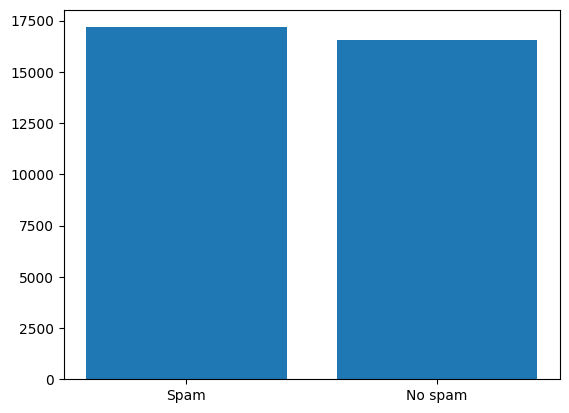

In [ ]:
import matplotlib.pyplot as plt

total_mails = len(mails)

spam_count = mails["Spam/Ham"].value_counts()["spam"]
ham_count = mails["Spam/Ham"].value_counts()["ham"]

spam_percentage = (spam_count / total_mails) * 100
ham_percentage = (ham_count / total_mails) * 100

print(f"Tổng số email: {total_mails}")
print(f"Số lượng email spam: {spam_count} ({spam_percentage:.2f}%)")
print(f"Số lượng email ham: {ham_count} ({ham_percentage:.2f}%)")

classes = ["Spam", "No spam"]
count = [spam_count, ham_count]
plt.bar(classes, count)

In [ ]:

# mails = mails[mails['Message Length'] != 0]
longest_mail = mails["Message Length"].max()
shortest_mail = mails["Message Length"].min()

print(f"Email dài nhất: {longest_mail} ký tự")
print(f"Email ngắn nhất: {shortest_mail} ký tự")

Email dài nhất: 141836 ký tự
Email ngắn nhất: 0 ký tự


In [ ]:
# mails = mails[mails['Message Length'] != 0]
longest_mail = mails["Token Count"].max()
shortest_mail = mails["Token Count"].min()

print(f"Email dài nhất: {longest_mail} tokens")
print(f"Email ngắn nhất: {shortest_mail} tokens")

Email dài nhất: 23318 tokens
Email ngắn nhất: 0 tokens


In [ ]:
mails

,Subject,Message,Spam/Ham,Date,Message Length,Token Count
0,countdown to 75 th anniversary celebration,employ attend 75 th anniversari celebr countdo...,ham,2000-09-05,1554,256
1,windows 2000 and outlook,soon migrat window 2000 outlook texa desk sche...,ham,2001-03-27,739,130
2,re : meter # : 1266 ; august 2000 / allocation...,lauri fluctuat dupont meter 1266 believ conoco...,ham,2000-08-21,3565,735
3,re : tenaska iv march 2001,ye dollar amount need recoup william take cred...,ham,2001-05-17,881,163
4,new book,plea creat follow book use sitara tagg let kno...,ham,2000-08-17,66,12
...,...,...,...,...,...,...
33711,xãnax for less,sa 7 _ 0 ord ere onl ine day vi sit site sa bi...,spam,2004-09-21,1267,175
33712,= ? utf - 8 ? q ? you will take just 1 ? =,utf 8 q 1 minut prepar utf 8 q e night utf 8 q...,spam,2005-03-20,300,55
33713,kenai review - note on urban dating in 2005,hi name madelin 20 year old fit bodi blond hai...,spam,2005-05-09,447,86
33714,increible ! ! ! - contratos 2004 - increible o...,contrato 2004 de 1000 modelo de contrato escri...,spam,2004-12-28,679,113


In [ ]:
longest_mail_index = mails["Message Length"].idxmax()
shortest_mail_index = mails["Message Length"].idxmin()
print(f"Email dài nhất:\n{mails.loc[longest_mail_index, 'Message']}")
print(f"\nEmail ngắn nhất:\n{mails.loc[shortest_mail_index, 'Message']}")

Email dài nhất:
enron wake call wall street journal 12 04 01 fall power giant dynegi hit back enron lawsuit claim fail merger entitl concern get northern natur ga wall street journal 12 04 01 enron secur 1 5 billion new financ j p morgan citigroup pact first step lifelin sought trade unit wall street journal 12 04 01 fall power giant burst chapter 11 file mark big year bankruptci bar wall street journal 12 04 01 fall power giant time creditor vie wall street journal 12 04 01 auditor andersen ad enron 401 k lawsuit wall street journal 12 04 01 stadium jinx call enron field enron fold mayb firm put name arena hit hard time former tran world dome wall street journal 12 04 01 kpn prepar sell new share investor remain lukewarm toward dutch telecom firm wall street journal 12 04 01 small stock focu genesi energi valenti plummet small cap stock fall slightli wall street journal 12 04 01 treasuri manag modest gain despit report suggest economi could rebound wall street journal 12 04 01 enron m

In [ ]:
longest_mail_index = mails["Token Count"].idxmax()
shortest_mail_index = mails["Token Count"].idxmin()
print(f"Email dài nhất:\n{mails.loc[longest_mail_index, 'Message']}")
print(f"\nEmail ngắn nhất:\n{mails.loc[shortest_mail_index, 'Message']}")

Email dài nhất:
enron wake call wall street journal 12 04 01 fall power giant dynegi hit back enron lawsuit claim fail merger entitl concern get northern natur ga wall street journal 12 04 01 enron secur 1 5 billion new financ j p morgan citigroup pact first step lifelin sought trade unit wall street journal 12 04 01 fall power giant burst chapter 11 file mark big year bankruptci bar wall street journal 12 04 01 fall power giant time creditor vie wall street journal 12 04 01 auditor andersen ad enron 401 k lawsuit wall street journal 12 04 01 stadium jinx call enron field enron fold mayb firm put name arena hit hard time former tran world dome wall street journal 12 04 01 kpn prepar sell new share investor remain lukewarm toward dutch telecom firm wall street journal 12 04 01 small stock focu genesi energi valenti plummet small cap stock fall slightli wall street journal 12 04 01 treasuri manag modest gain despit report suggest economi could rebound wall street journal 12 04 01 enron m

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Combine all cleaned content into a single string
all_text = ' '.join(mails['Message'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      stopwords=STOPWORDS,
                      min_font_size=10).generate(all_text)

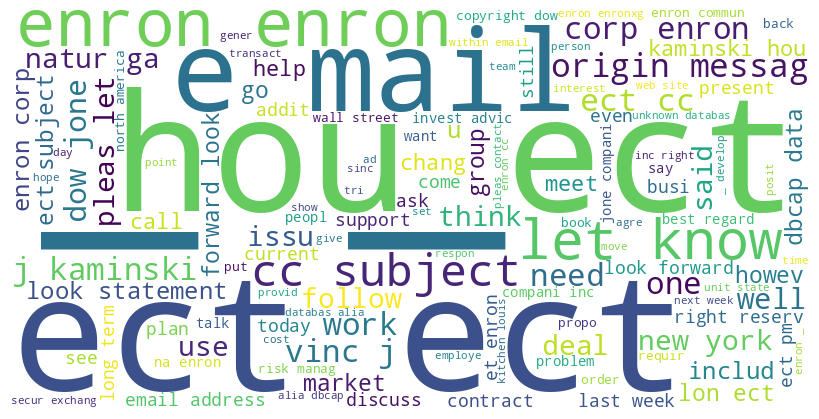

In [ ]:
# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from collections import Counter
all_tokens = []
for text in mails['Message']:
     tokens = text.split()  # Split the text into tokens
     all_tokens.extend(tokens)  # Add the tokens to the overall list

token_counts = Counter(all_tokens)  # Count the frequency of each token
print(token_counts)  # Print the 10 most common tokens

Counter({'_': 68307, 'enron': 59786, 'ect': 35664, 'compani': 28563, 'com': 23953, '1': 22618, 'pleas': 20870, '2': 19481, '3': 17719, 'hou': 17264, 'e': 15592, 'time': 15537, 'would': 15461, '2001': 15229, 'price': 15202, 'inform': 14743, 'market': 14711, 'new': 14367, '10': 14163, 'subject': 14126, '2000': 13628, 'busi': 13563, 'may': 12968, '5': 12880, '00': 12446, 'get': 12211, 'one': 12196, 'need': 12068, 'thank': 12058, 'said': 11880, 'ga': 11623, 'us': 11222, 'year': 11204, 'mail': 11192, 'energi': 11167, 'http': 11149, 'email': 11011, 'report': 11005, '0': 10900, 'messag': 10788, 'trade': 10734, 'use': 10710, 'day': 10615, '4': 10559, 'forward': 10480, 'deal': 10244, 'stock': 10192, 'manag': 10188, 'secur': 10188, '000': 10156, 'work': 9856, 'know': 9718, 'pm': 9642, 'servic': 9555, 'invest': 9441, 'like': 9423, 'cc': 9379, '11': 9267, 'product': 9252, 'make': 9231, 'power': 9206, 'also': 9201, 'look': 9004, 'provid': 8686, 'go': 8568, '01': 8566, 'vinc': 8563, 'week': 8208, 'i

In [ ]:
print(len(token_counts))# số lượng từ duy nhất

130860


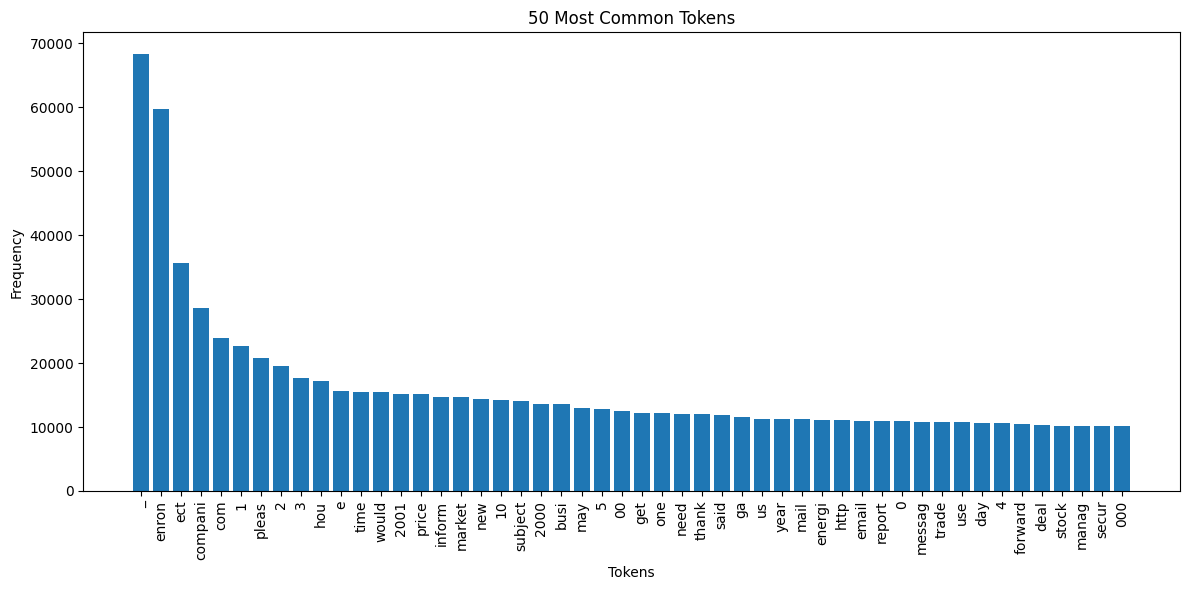

130860


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

all_tokens = []
for text in mails['Message']:
    tokens = text.split()
    all_tokens.extend(tokens)

token_counts = Counter(all_tokens)

# Get the most common tokens and their frequencies
num_most_common = 50  # Change this to the desired number of most common tokens
most_common_tokens = token_counts.most_common(num_most_common)

# Extract tokens and frequencies for plotting
tokens, frequencies = zip(*most_common_tokens)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(tokens, frequencies)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title(f"{num_most_common} Most Common Tokens")
plt.tight_layout()
plt.show()

print(len(token_counts))  # Print the total number of unique tokens

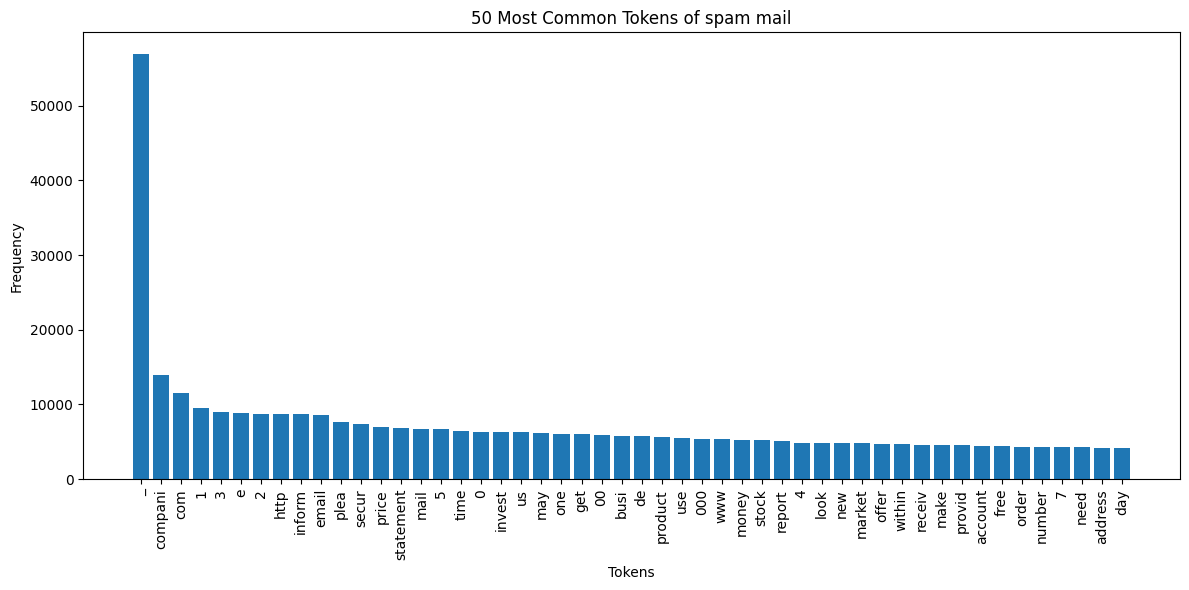

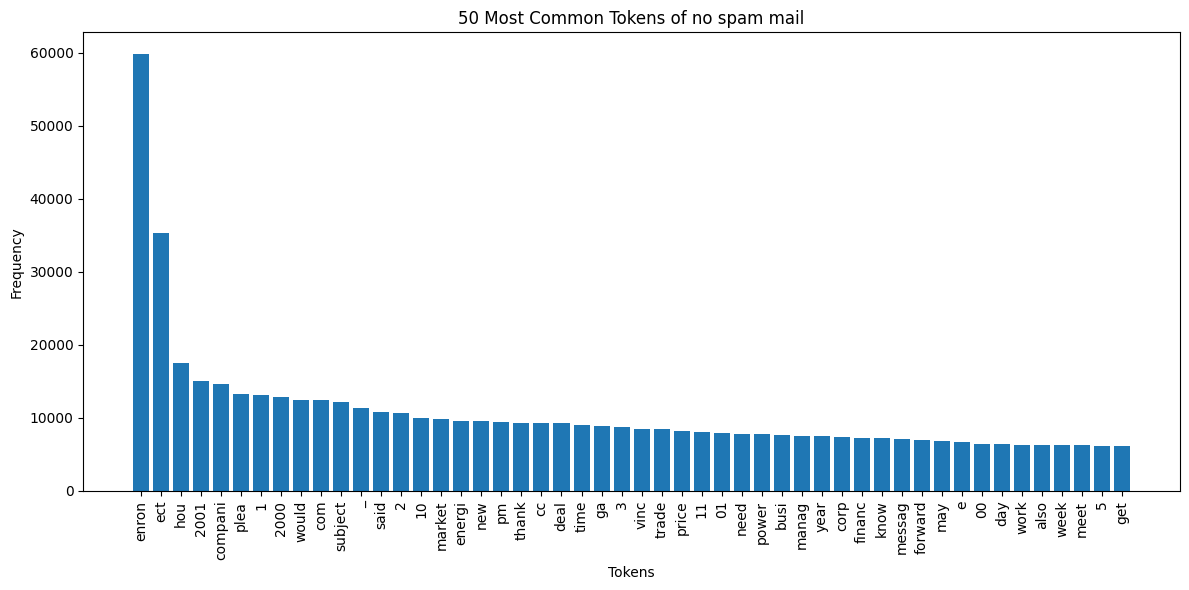

In [ ]:
from collections import Counter
num_most_common=50
def get_top_words(emails, num_top_words=20):
    """Gets the top N common words in a set of emails."""
    all_words = []
    for message in emails["Message"]:
        words = message.split()
        all_words.extend(words)
    token_counts = Counter(all_words)
    return token_counts.most_common(num_top_words)

# Separate spam and non-spam emails
spam_emails = mails[mails["Spam/Ham"] == "spam"]
no_spam_emails = mails[mails["Spam/Ham"] == "ham"]

# Get top words for spam emails
spam_top_words = get_top_words(spam_emails,num_most_common)
# Extract tokens and frequencies for plotting
spam_tokens, spam_frequencies = zip(*spam_top_words)

# Get top words for non-spam emails
no_spam_top_words = get_top_words(no_spam_emails,num_most_common)
Nspam_tokens, Nspam_frequencies = zip(*no_spam_top_words)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(spam_tokens, spam_frequencies)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title(f"{num_most_common} Most Common Tokens of spam mail")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(Nspam_tokens, Nspam_frequencies)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title(f"{num_most_common} Most Common Tokens of no spam mail")
plt.tight_layout()
plt.show()

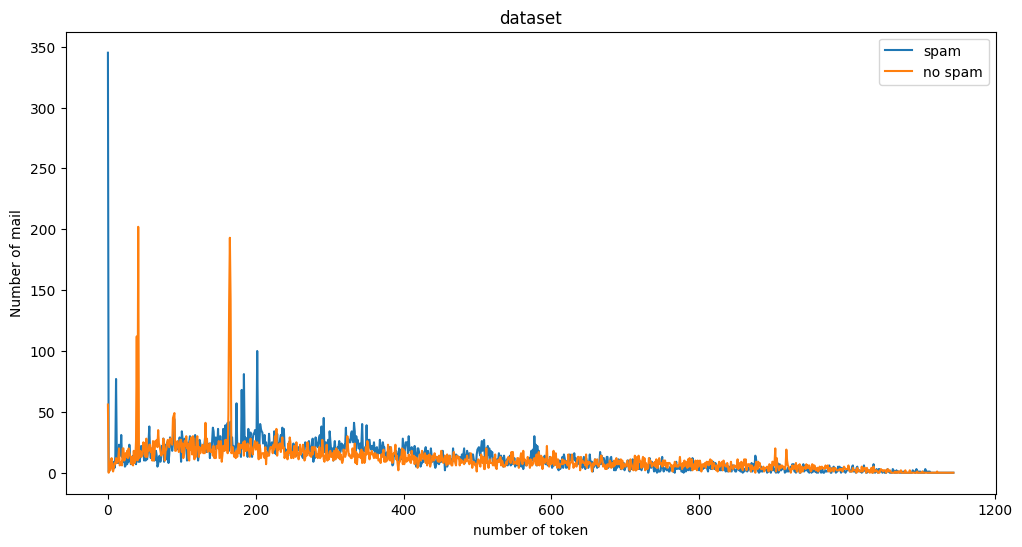

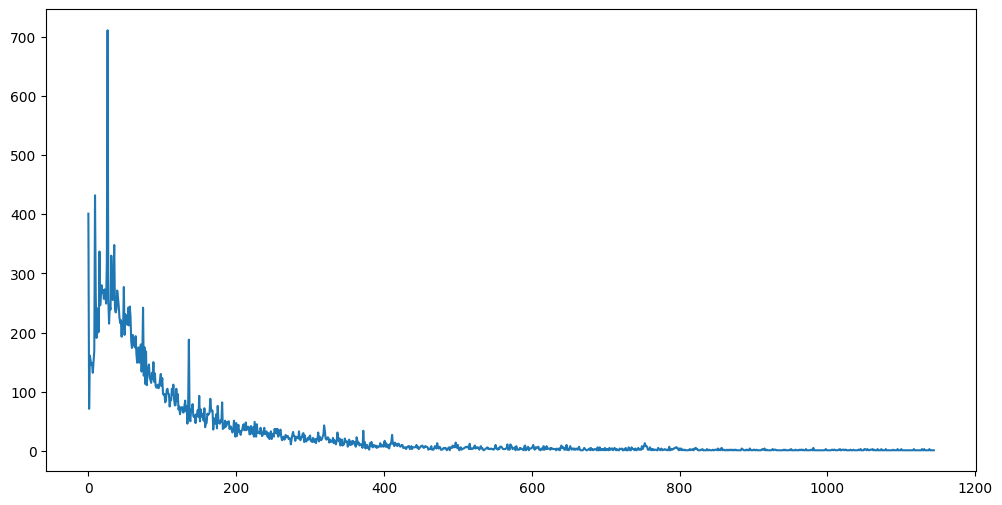

In [ ]:
import numpy as np

# Lấy danh sách độ dài tin nhắn
message_lengths = mails["Token Count"].values

# Tạo ma trận 2 cột
matrix = []
unique_lengths = np.unique(message_lengths)  # Lấy các độ dài tin nhắn duy nhất
spam_message_lengths = mails[mails["Spam/Ham"] == "spam"]["Message Length"].values
no_spam_message_lengths = mails[mails["Spam/Ham"] == "ham"]["Message Length"].values



for length in unique_lengths:
  count1 = np.count_nonzero(message_lengths == length)  # Đếm số lần xuất hiện của độ dài tin nhắn
  count2 = np.count_nonzero(spam_message_lengths == length)
  count3 = np.count_nonzero(no_spam_message_lengths == length)
  # if count >10:
  matrix.append([length, count1,count2,count3])

matrix = np.array(matrix)  # Chuyển đổi sang array NumPy

# Hiển thị ma trận
# print(matrix)

plt.figure(figsize=(12, 6))
plt.plot( matrix[0:,2])
plt.plot( matrix[0:,3])
plt.xlabel("number of token")
plt.ylabel("Number of mail")
plt.legend(["spam","no spam"])
plt.title("dataset")
# plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot( matrix[0:,1])
plt.show()

In [ ]:
print("number of token in dataset: ",np.sum(matrix[:,0]*matrix[:,1]))

number of token in dataset:  5187044


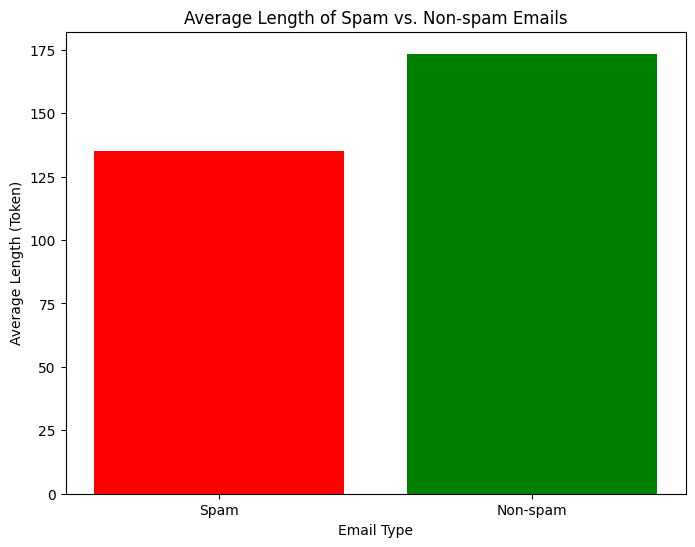

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate average length of spam emails
spam_emails = mails[mails["Spam/Ham"] == "spam"]
avg_spam_length = np.mean(spam_emails["Token Count"])

# Calculate average length of non-spam (ham) emails
ham_emails = mails[mails["Spam/Ham"] == "ham"]
avg_ham_length = np.mean(ham_emails["Token Count"])

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(["Spam", "Non-spam"], [avg_spam_length, avg_ham_length], color=['red', 'green'])
plt.title("Average Length of Spam vs. Non-spam Emails")
plt.ylabel("Average Length (Token)")
plt.xlabel("Email Type")
plt.show()

Number of unique words in spam emails: 102693
Number of unique words in non-spam emails: 47029


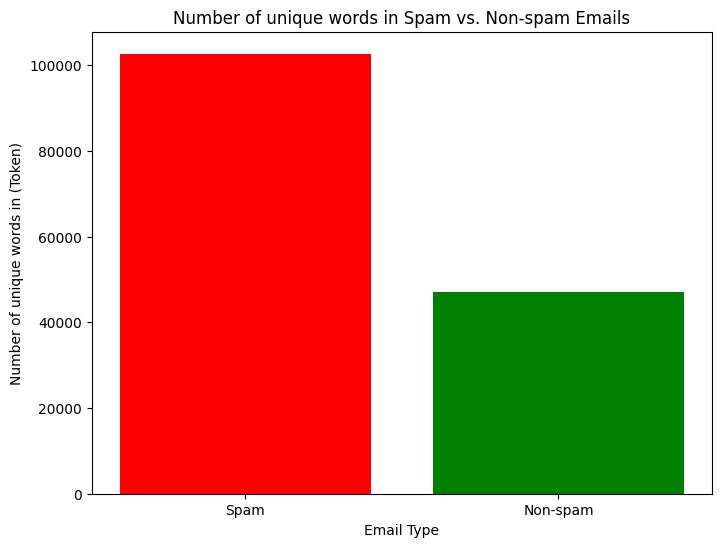

In [ ]:
from collections import Counter

def get_unique_words(emails):
  """Calculates the number of unique words in a set of emails."""
  all_words = []
  for message in emails["Message"]:
      words = message.split()
      all_words.extend(words)
  unique_words = set(all_words)  # Use a set to get unique words
  # print(unique_words)
  return len(unique_words)

# Calculate unique words for spam and ham emails
spam_unique_words = get_unique_words(mails[mails["Spam/Ham"] == "spam"])
ham_unique_words = get_unique_words(mails[mails["Spam/Ham"] == "ham"])

# Print the results
print(f"Number of unique words in spam emails: {spam_unique_words}")
print(f"Number of unique words in non-spam emails: {ham_unique_words}")

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(["Spam", "Non-spam"], [spam_unique_words, ham_unique_words], color=['red', 'green'])
plt.title("Number of unique words in Spam vs. Non-spam Emails")
plt.ylabel("Number of unique words in (Token)")
plt.xlabel("Email Type")
plt.show()

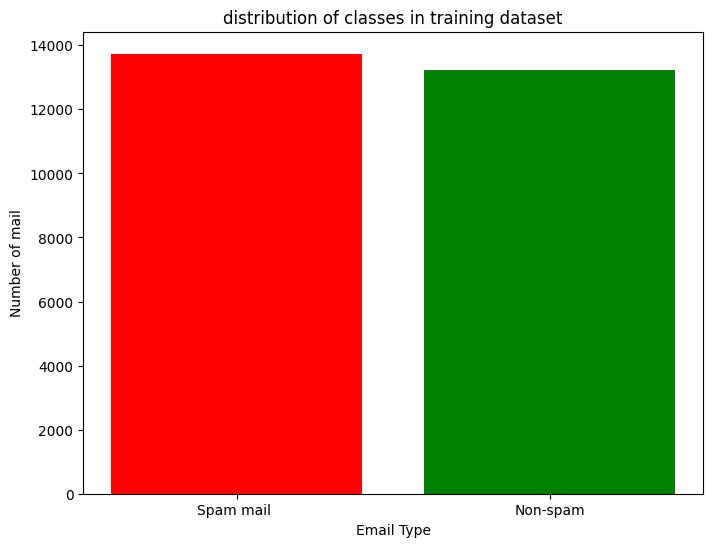

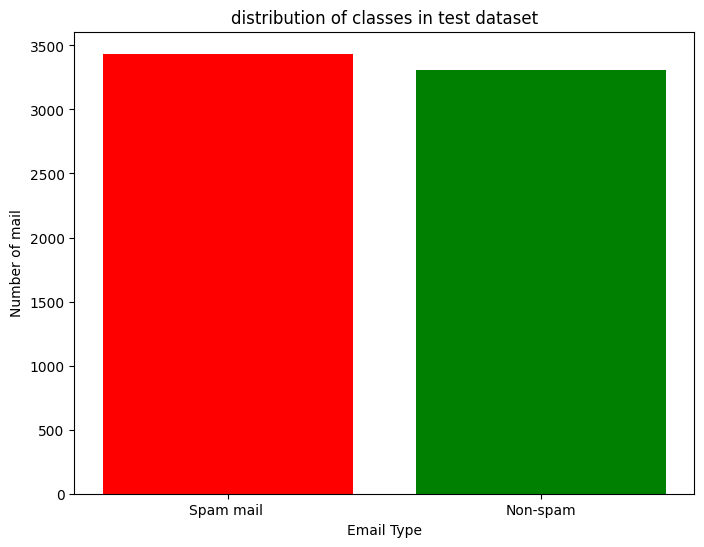

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have X_train, X_test, y_train, y_test from your train_test_split

# Training set
train_spam_count = np.sum(y_train == 1)  # Assuming 1 represents spam
train_ham_count = np.sum(y_train == 0)  # Assuming 0 represents ham

# Test set
test_spam_count = np.sum(y_test == 1)
test_ham_count = np.sum(y_test == 0)

# Create bar chart
labels = ['Training Set', 'Test Set']
train_count= [train_spam_count, train_ham_count]
test_count = [test_spam_count, test_ham_count]
# spam_counts = [train_spam_count, test_spam_count]
# ham_counts = [train_ham_count, test_ham_count]

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(["Spam mail ", "Non-spam"], train_count, color=['red', 'green'])
plt.title("distribution of classes in training dataset")
plt.ylabel("Number of mail")
plt.xlabel("Email Type")
plt.show()

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(["Spam mail ", "Non-spam"], test_count, color=['red', 'green'])
plt.title("distribution of classes in test dataset")
plt.ylabel("Number of mail")
plt.xlabel("Email Type")
plt.show()

#cnn Model

In [ ]:
# Reshape X_train_vec for CNN input
X_train_vec_cnn = X_train_vec.toarray().reshape(X_train_vec.shape[0], X_train_vec.shape[1], 1)
X_test_vec_cnn = X_test_vec.toarray().reshape(X_test_vec.shape[0], X_test_vec.shape[1], 1)
print(X_train_vec_cnn.shape)
print(X_test_vec_cnn.shape)

(26972, 1000, 1)
(6744, 1000, 1)


In [ ]:
import numpy as np
NUM_CLIENTS = 3  # Number of simulated clients

def client_data_subsets(X_train_vec_cnn, y_train, NUM_CLIENTS=NUM_CLIENTS):
  # X_train_pad[0]
  # Calculate the number of samples per client
  samples_per_client = X_train_vec_cnn.shape[0] // NUM_CLIENTS

  # Create client data subsets
  client_data_subsets = []
  for i in range(NUM_CLIENTS):
      start = i * samples_per_client
      end = (i + 1) * samples_per_client
      client_data_x = X_train_vec_cnn[start:end]
      client_data_y = y_train[start:end]
      client_data_subsets.append((client_data_x, client_data_y))
  return client_data_subsets

In [ ]:
# X_train_pad[0]

In [ ]:
import collections
import tensorflow as tf
import tensorflow_federated as tff
import numpy as np

# Create a list of tf.data.Datasets, one for each client
client_datasets = [
    tf.data.Dataset.from_tensor_slices((client_data_x, client_data_y)).batch(20)  # Ensure client_data_y is of type int64
    for client_data_x, client_data_y in client_data_subsets(X_train_vec_cnn,y_train)
]

test_datasets = [
    tf.data.Dataset.from_tensor_slices((client_data_x, client_data_y)).batch(20)  # Ensure client_data_y is of type int64
    for client_data_x, client_data_y in client_data_subsets(X_test_vec_cnn,y_test)
]
# Model Modification
keras_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 5,1, activation='relu', input_shape=(X_train_vec_cnn.shape[1:])),
    tf.keras.layers.Conv1D(64,5,1, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

# Define metrics_constructor function correctly
def metrics_constructor():
    return collections.OrderedDict(
        accuracy=tf.keras.metrics.SparseCategoricalAccuracy(),
        loss = tf.keras.metrics.SparseCategoricalCrossentropy()
    )

tff_model = tff.learning.models.functional_model_from_keras(
    keras_model,
    loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(),
    input_spec=client_datasets[0].element_spec,
    metrics_constructor=metrics_constructor)

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 438, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/usr/local/lib/python3.11/dist-packages/jax_plugins/xla_cuda12/__init__.py", line 85, in initialize
    options = xla_client.generate_pjrt_gpu_plugin_options()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'jaxlib.xla_client' has no attribute 'generate_pjrt_gpu_plugin_options'


In [ ]:
X_train_vec_cnn.shape[1:]

(1000, 1)

In [ ]:
# Federated Training
# trainer = tff.learning.algorithms.build_weighted_fed_avg(
#   tff_model,
#   client_optimizer_fn=tff.learning.optimizers.build_sgdm(learning_rate=0.001),
#   server_optimizer_fn=tff.learning.optimizers.build_sgdm(learning_rate=1.0)
# )

def learning_rate_fn(lr=0.1):
    return tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=lr,
        decay_steps=6,
        decay_rate=0.96
    )
trainer = tff.learning.algorithms.build_weighted_fed_avg_with_optimizer_schedule(
  tff_model,
  client_learning_rate_fn=learning_rate_fn(0.01),
  client_optimizer_fn=lambda learning_rate=0.1: tff.learning.optimizers.build_sgdm(learning_rate)
)

# trainer = tff.learning.algorithms.build_weighted_mime_lite(
#     tff_model,
#     base_optimizer= tff.learning.optimizers.build_sgdm(learning_rate=0.01)
# )

state = trainer.initialize()
evaluation_process = tff.learning.algorithms.build_fed_eval(tff_model)
evaluation_state = evaluation_process.initialize()

In [ ]:
acc=[]
loss=[]
for i in range(35):
  result = trainer.next(state, client_datasets)
  state = result.state
  train_metrics = result.metrics

  model_weights = trainer.get_model_weights(state)
  evaluation_state = evaluation_process.set_model_weights(
    evaluation_state, model_weights
  )
  evaluation_test = evaluation_process.next(
    evaluation_state, test_datasets
  )
  evaluation_train = evaluation_process.next(
    evaluation_state, client_datasets
  )
  # print(evaluation_test.metrics)
  # print(train_metrics)
  acc.append([evaluation_train.metrics['client_work']['eval']['total_rounds_metrics']['accuracy'],evaluation_test.metrics['client_work']['eval']['total_rounds_metrics']['accuracy']])
  loss.append([evaluation_train.metrics['client_work']['eval']['total_rounds_metrics']['loss'],evaluation_test.metrics['client_work']['eval']['total_rounds_metrics']['loss']])
  print("Result in train dataset round: ",i+1," with accuracy: ",evaluation_train.metrics['client_work']['eval']['total_rounds_metrics']['accuracy']," loss: ",evaluation_train.metrics['client_work']['eval']['total_rounds_metrics']['loss'])
  print("Result in test dataset round: ",i+1," with accuracy: ",evaluation_test.metrics['client_work']['eval']['total_rounds_metrics']['accuracy']," loss: ",evaluation_test.metrics['client_work']['eval']['total_rounds_metrics']['loss'])


Result in train dataset round:  1  with accuracy:  0.7352243  loss:  0.65544766
Result in test dataset round:  1  with accuracy:  0.7396204  loss:  0.65497744
Result in train dataset round:  2  with accuracy:  0.8078235  loss:  0.4970231
Result in test dataset round:  2  with accuracy:  0.8072361  loss:  0.49581978
Result in train dataset round:  3  with accuracy:  0.9224323  loss:  0.24575876
Result in test dataset round:  3  with accuracy:  0.92170817  loss:  0.24815765
Result in train dataset round:  4  with accuracy:  0.9465332  loss:  0.16143669
Result in test dataset round:  4  with accuracy:  0.9452847  loss:  0.16597718
Result in train dataset round:  5  with accuracy:  0.9570263  loss:  0.12972212
Result in test dataset round:  5  with accuracy:  0.9558126  loss:  0.13481784
Result in train dataset round:  6  with accuracy:  0.9630701  loss:  0.111382276
Result in test dataset round:  6  with accuracy:  0.95951957  loss:  0.11671392
Result in train dataset round:  7  with accu

In [ ]:

keras_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(32, 5, 1, activation='relu', input_shape=(X_train_vec_cnn.shape[1:])),
    tf.keras.layers.Conv1D(64, 5, 1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax'),
])

# Get the final trained model weights from TFF
final_model_weights = trainer.get_model_weights(state)


final_model_weights_as_list = [x for x in final_model_weights.trainable]

#  Load weights into the new Keras model
keras_model.set_weights(final_model_weights_as_list)

#  Compile the model (required for prediction)
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#  Perform predictions on X_test_vec_cnn directly
predictions = keras_model.predict(X_test_vec_cnn)  # No need to reconstruct test data

# Convert softmax outputs to class labels
predicted_labels = np.argmax(predictions, axis=1)

predicted_labels=np.array(predicted_labels)

print("Predicted Labels:", predicted_labels)


211/211 [==============================] - 10s 44ms/step
Predicted Labels: [1 1 1 ... 0 1 1]


In [ ]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 996, 32)           192       
                                                                 
 conv1d_3 (Conv1D)           (None, 992, 64)           10304     
                                                                 
 flatten_1 (Flatten)         (None, 63488)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8126592   
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 8137346 (31.04 MB)
Trainable params: 8137346 (31.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

classes = ["No spam","Spam"]
def plot_confusion_matrix(true_label, predict_label, pl = True):
    # true_label = true_label.reshape(true_label.shape[0], 1)
    # predict_label = predict_label.reshape(predict_label.shape[0], 1)

    cm = confusion_matrix(y_true = true_label, y_pred = predict_label)
    print(cm)
    cm_per = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]*100,2)

    if pl == True:
        df_cm = pd.DataFrame(cm_per, index = classes, columns = classes)
        plt.figure(figsize = (7, 6))
        sns.heatmap(df_cm, annot=True, cmap = "Blues",vmax=100, linewidths=.1 ,fmt='.2f')
        plt.title("Confusion matrix")
        plt.xlabel('Predict', fontsize=12)
        plt.ylabel('True', fontsize=12)
        plt.tight_layout()


[[3201  108]
 [  36 3399]]


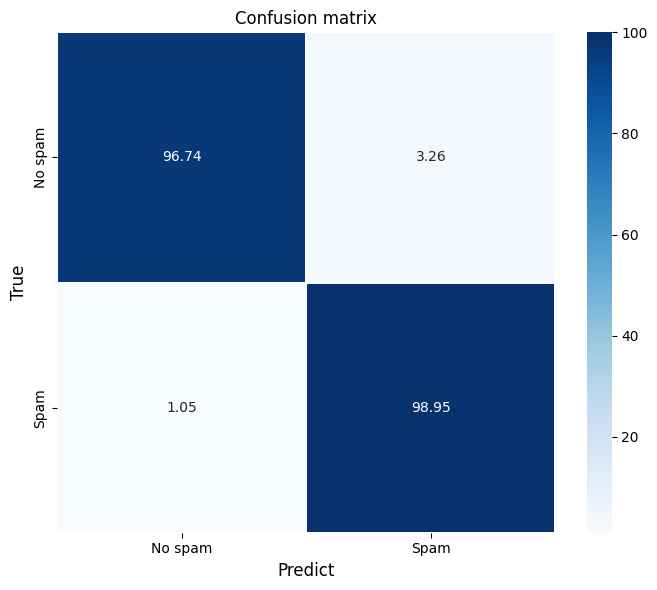

In [ ]:
plot_confusion_matrix(y_test,predicted_labels)

#Result

In [ ]:
from sklearn.metrics import  accuracy_score, precision_score,recall_score, f1_score,classification_report,confusion_matrix, RocCurveDisplay, roc_curve, auc,precision_recall_curve, average_precision_score, PrecisionRecallDisplay

# algorithms 1
# Calculate metrics
y_pred =  np.array(predicted_labels).reshape(y_test.shape)
model = keras_model
n_classes = 2
model_name ='weighted_fed_avg'
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n{model_name} Metrics:")
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred)

y_score = model.predict(X_test_vec_cnn)

# Calculate predicted probabilities for ROC and PR curves
y_score = model.predict(X_test_vec_cnn)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute Precision-Recall curve and Average Precision for each class
pr_precision = dict()
pr_recall = dict()
average_precision = dict()
for i in range(n_classes):
    pr_precision[i], pr_recall[i], _ = precision_recall_curve(y_test == i, y_score[:, i])
    average_precision[i] = average_precision_score(y_test == i, y_score[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green']
for i, color in enumerate(colors):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'Class {i-1}').plot(ax=plt.gca(), color=color)

plt.title("ROC Curve for Naive Bayes Multi-Class Sentiment Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend([f"Class {label}" for label in classes], loc="lower right")
plt.grid()
plt.show()

# Plot Precision-Recall curves for each class
plt.figure(figsize=(10, 8))
for i, color in enumerate(colors):
    PrecisionRecallDisplay(precision=pr_precision[i], recall=pr_recall[i], average_precision=average_precision[i]).plot(
        ax=plt.gca(), name=f'Class {i-1}', color=color
    )

plt.title("Precision-Recall Curve for Naive Bayes Multi-Class Sentiment Classification")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend([f"Class {label}" for label in classes], loc="lower left")
plt.grid()
plt.show()
